
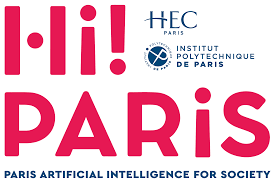

___


* <b>Author: Gaëtan Brison - ML Research Engineer - Institut Polytechnique de Paris</b>
* <b>Publication Date: 06/23/2022</b>
* <b>Goal: The goal of this notebook is to explain in a simple way how to use github api</b>

___

## I) Github API Documentation 

[Github API Documentation](https://docs.github.com/en/rest)

## II) Import Packages

In [3]:
import os
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from typing import List, Any
from datetime import datetime
from urllib.request import Request, urlopen
import time
import json
pd.set_option('display.max_rows', 500)

## III) Functions to collect GitHub API Info without Identification

In [13]:
def fetch_github_dev_info (login):
    ''' The goal of this function is to collect relevant information based on Github login provided as input
    
    
    Parameters
    ----------
    
    login : string, default=None
    Github login of user you want to collect information from
    
    
    Returns
    -------
    
    github_login : string
    Github login
    
    github_id : integer
    Id of user in the Github database
    
    github_name : string
    Name of user on Github
    
    
    github_company : string
    Company of user on Github
    
    
    github_location : string
    Location of user if specified
    
    
    github_email : string
    Email associated to Github account
    
    
    github_bio : string
    Description done by user 
    
    
    github_public_repos : integer
    Number of repos made public
    
    
    github_followers : integer
    Number of people following user
    
    
    github_following : integer
    Number of people followed by user
    
    github_created_at : string
    Date of creation of account
    
    
    github_updated_at : string
    Date of last update of account's content
    
    
    '''
    
    req = Request(f"https://api.github.com/users/{login}", headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    webpage = webpage.decode('utf-8')
    soup = BeautifulSoup(webpage, 'html.parser')

    dictionary_user_description = json.loads(str(soup))
    print(" Display full user/dev dictionary")
    print(" ")
    print(dictionary_user_description)
    print(" ")

    github_login = dictionary_user_description.get("login")
    github_id = dictionary_user_description.get("id")
    github_name = dictionary_user_description.get("name")
    github_company = dictionary_user_description.get("company")
    github_location = dictionary_user_description.get("location")
    github_email = dictionary_user_description.get("email")
    github_bio = dictionary_user_description.get("bio")
    github_public_repos = dictionary_user_description.get("public_repos")
    github_followers = dictionary_user_description.get("followers")
    github_following = dictionary_user_description.get("following")
    github_created_at = dictionary_user_description.get("created_at")
    github_updated_at  = dictionary_user_description.get("updated_at")
        
    return github_login, github_id, github_name, github_company, github_location, github_email, github_bio, github_public_repos, github_followers, github_following, github_created_at, github_updated_at



## IV - Test Function: fetch_github_dev_info

In [14]:
login = "gaetanbrison" 
fetch_github_dev_info (login)

 Display full user/dev dictionary
 
{'login': 'gaetanbrison', 'id': 59415807, 'node_id': 'MDQ6VXNlcjU5NDE1ODA3', 'avatar_url': 'https://avatars.githubusercontent.com/u/59415807?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/gaetanbrison', 'html_url': 'https://github.com/gaetanbrison', 'followers_url': 'https://api.github.com/users/gaetanbrison/followers', 'following_url': 'https://api.github.com/users/gaetanbrison/following{/other_user}', 'gists_url': 'https://api.github.com/users/gaetanbrison/gists{/gist_id}', 'starred_url': 'https://api.github.com/users/gaetanbrison/starred{/owner}{/repo}', 'subscriptions_url': 'https://api.github.com/users/gaetanbrison/subscriptions', 'organizations_url': 'https://api.github.com/users/gaetanbrison/orgs', 'repos_url': 'https://api.github.com/users/gaetanbrison/repos', 'events_url': 'https://api.github.com/users/gaetanbrison/events{/privacy}', 'received_events_url': 'https://api.github.com/users/gaetanbrison/received_events', 'type': 'U

('gaetanbrison',
 59415807,
 'Gaëtan',
 'Institut Polytechnique de Paris',
 None,
 None,
 None,
 31,
 1,
 2,
 '2020-01-01T15:31:12Z',
 '2022-06-23T12:24:40Z')

## Congrats 🎉 You know how to use GitHub API